# Segmentation

This module will demonstrate how to seperate the image into smaller images of the clusters. The pipeline performs the following operations:
    
    - Load image.
    - Convert image to grayscale.
    - Convert image to binary.
    - Convert image to set.
    - Dilate image by factor x.
    - For all foreground pixels find connected pixels as new set with flood fill algorithm.
    - Get boundary boxes.
    - Extract subimages.
    - Write subimages to disk.

In [1]:
# Import the necessary libraries.
import modules.oiplib as oiplib
import numpy as np
import time

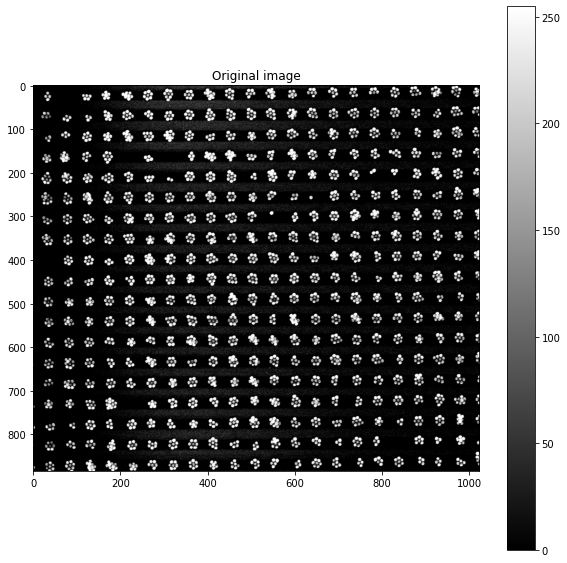

In [2]:
# Load the image.
grayImg = oiplib.rgb2GrayLuminosity(oiplib.loadImage('../images/heptamers.png'))
oiplib.showImage(grayImg, "Original image", figsize=(10, 10), cmap="gray");

In [ ]:
# Convert grayscale image to binary image.
binImg = oiplib.gray2Binary(grayImg)
oiplib.showImage(binImg, "Binary image", figsize=(10, 10), vmax=1);

In [ ]:
# Start performance timer.
start = time.perf_counter()

# Grow binary image.
grownBinImg = oiplib.growBinary(binImg, 11)

# Stop performance timer.
stop = time.perf_counter()

In [ ]:
# Show dilated picture.
oiplib.showImage(grownBinImg, "Grown image", figsize=(10, 10), vmax=1);

In [ ]:
# Display runtime performance.
print("Time elapsed during growing: %.2fs"%(stop - start))

In [ ]:
# Start performance timer.
start = time.perf_counter()

# Find regions in image.
regionImg = oiplib.labelRegions(grownBinImg, lmin=50)

# Stop performance timer.
stop = time.perf_counter()

In [ ]:
# Show regions in picture.
oiplib.showImage(regionImg, "Regions in image", figsize=(10, 10), cmap="hsv", vmax=np.amax(regionImg)+50);

In [ ]:
# Display runtime performance.
print("Time elapsed during labelling: %.2fs"%(stop - start))

In [ ]:
# Start performance timer.
start = time.perf_counter()

# Get the boundary boxes.
anchors, boxSize = oiplib.getBoundaryBoxes(regionImg)

# Stop performance timer.
stop = time.perf_counter()

In [ ]:
# Display runtime performance.
print("Time elapsed during boundary box generation: %.2fs"%(stop - start))

In [ ]:
# Display example clusters.
for i in range(len(anchors)):
    x, y = anchors[i]
    
    # Crop cluster image and remove noise.
    clusterImg = oiplib.removeBackgroundNoise(grayImg[x:x+boxSize, y:y+boxSize])
    
    # Display example images.
    if i < 10:
        oiplib.showImage(clusterImg, "cluster%03d"%(i), figsize=(2, 2));
    
    # Write out all clusters.
    oiplib.saveImage("../images/clusters/cluster%03d.png"%(i), clusterImg, cmap="gray")